In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv("data/rental-data-clean2.csv")

In [4]:
df.shape

(1100, 14)

In [5]:
df.rename(columns={"Number of Schools": "School_number", 
                   "Average School Rating": "School_rating",
                   "Median Rental Price": "rental_price",
                   "Median Listing Price": "listing_price"},
         inplace=True)

In [6]:
df.drop("Type",axis=1,inplace=True)

In [7]:
df.shape

(1100, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
Unnamed: 0         1100 non-null int64
Address            1100 non-null object
Sqft               1100 non-null float64
Beds               1100 non-null int64
Bath               1100 non-null float64
Built              1100 non-null float64
School_number      1100 non-null int64
School_rating      1100 non-null float64
rental_price       1100 non-null float64
listing_price      1100 non-null float64
community_count    1100 non-null int64
unit_count         1100 non-null int64
Price              1100 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 111.8+ KB


In [9]:
X = df.iloc[:,2:12]
y = df.iloc[:,-1]

In [10]:
X.head()

,Sqft,Beds,Bath,Built,School_number,School_rating,rental_price,listing_price,community_count,unit_count
0,538.0,0,1.0,2009.0,4,6.25,2650.0,684990.0,19,1
1,671.0,1,1.0,2009.0,4,6.25,2650.0,684990.0,19,1
2,695.0,1,1.0,2009.0,4,6.25,2650.0,684990.0,19,1
3,724.0,1,1.0,2009.0,4,6.25,2650.0,684990.0,19,1
4,1120.0,2,2.0,2009.0,4,6.25,2650.0,684990.0,19,1


In [11]:
y.head()

0    1657.0
1    1925.0
2    1925.0
3    1918.0
4    2623.0
Name: Price, dtype: float64

In [12]:
df1 = pd.concat([y,X],axis=1)
df1.corr()

,Price,Sqft,Beds,Bath,Built,School_number,School_rating,rental_price,listing_price,community_count,unit_count
Price,1.000000,0.641508,0.393097,0.522943,0.185618,-0.278156,-0.038957,0.073999,0.063514,0.008684,-0.077777
Sqft,0.641508,1.000000,0.766995,0.687668,0.094765,-0.026517,-0.015506,-0.105692,-0.084364,-0.149325,0.037590
Beds,0.393097,0.766995,1.000000,0.664110,0.046069,0.085267,0.005463,-0.113769,-0.104340,-0.164659,0.078391
Bath,0.522943,0.687668,0.664110,1.000000,0.091397,-0.032316,-0.031016,-0.066578,-0.050207,-0.116311,-0.014515
Built,0.185618,0.094765,0.046069,0.091397,1.000000,-0.072097,0.133321,0.079708,0.094087,0.077892,0.025608
School_number,-0.278156,-0.026517,0.085267,-0.032316,-0.072097,1.000000,0.286416,-0.076514,-0.060868,0.066060,0.139229
School_rating,-0.038957,-0.015506,0.005463,-0.031016,0.133321,0.286416,1.000000,0.229107,0.291782,0.056596,0.060312
rental_price,0.073999,-0.105692,-0.113769,-0.066578,0.079708,-0.076514,0.229107,1.000000,0.854743,0.018186,-0.085848
listing_price,0.063514,-0.084364,-0.104340,-0.050207,0.094087,-0.060868,0.291782,0.854743,1.000000,0.018924,-0.064105
community_count,0.008684,-0.149325,-0.164659,-0.116311,0.077892,0.066060,0.056596,0.018186,0.018924,1.000000,0.054806


In [13]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.5488639489896516

In [14]:
x_part = " + ".join(X.columns)

In [15]:
string = y.name + ' ~ ' + x_part
string

'Price ~ Sqft + Beds + Bath + Built + School_number + School_rating + rental_price + listing_price + community_count + unit_count'

In [16]:
y1,X1 = patsy.dmatrices(string,data=df,return_type="dataframe")

In [17]:
model = sm.OLS(y1,X1)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 11 Oct 2018   Prob (F-statistic):          2.01e-180
Time:                        17:32:08   Log-Likelihood:                -9134.9
No. Observations:                1100   AIC:                         1.829e+04
Df Residuals:                    1089   BIC:                         1.835e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.389e+04   3093.447     -4.490      0.000      -2e+04   -7820.163
Sqft                2.4373      0.122     19.906      0.000       2.197       2.678
Beds             -356.2730     55.674     -6.399      0.000    -465.514    -247.032
Bath              596.9922     88.266      6.764      0.000     423.802     770.183
Built               5.8529      1.521      3.849      0.000       2.869       8.836
School_number    -345.3570     34.178    -10.105      0.000    -412.418    -278.296
School_rating       7.9883     20.666      0.387      0.699     -32.561      48.538
rental_price        1.6230      0.491      3.304      0.001       0.659       2.587
listing_price      -0.0011      0.001     -0.790      0.429      -0.004       0.002
community_count     8.0873      1.565      5.166      0.000       5.016      11.159
unit_count       -142.3902     57.050     -2.496      0.013    -254.330     -30.451
==============================================================================
Omnibus:                      808.177   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37814.768
Skew:                           2.856   Prob(JB):                         0.00
Kurtosis:                      31.150   Cond. No.                     7.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
lm1 = smf.ols(string,data=df)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 11 Oct 2018   Prob (F-statistic):          2.01e-180
Time:                        17:32:09   Log-Likelihood:                -9134.9
No. Observations:                1100   AIC:                         1.829e+04
Df Residuals:                    1089   BIC:                         1.835e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.389e+04   3093.447     -4.490      0.000      -2e+04   -7820.163
Sqft                2.4373      0.122     19.906      0.000       2.197       2.678
Beds             -356.2730     55.674     -6.399      0.000    -465.514    -247.032
Bath              596.9922     88.266      6.764      0.000     423.802     770.183
Built               5.8529      1.521      3.849      0.000       2.869       8.836
School_number    -345.3570     34.178    -10.105      0.000    -412.418    -278.296
School_rating       7.9883     20.666      0.387      0.699     -32.561      48.538
rental_price        1.6230      0.491      3.304      0.001       0.659       2.587
listing_price      -0.0011      0.001     -0.790      0.429      -0.004       0.002
community_count     8.0873      1.565      5.166      0.000       5.016      11.159
unit_count       -142.3902     57.050     -2.496      0.013    -254.330     -30.451
==============================================================================
Omnibus:                      808.177   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37814.768
Skew:                           2.856   Prob(JB):                         0.00
Kurtosis:                      31.150   Cond. No.                     7.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
x = list(X.columns)
x.remove('School_rating')
x.remove('listing_price')
x_part2 = ' + '.join(x)
string2 = y.name + ' ~ '+ x_part2
string2

'Price ~ Sqft + Beds + Bath + Built + School_number + rental_price + community_count + unit_count'

In [20]:
lm2 = smf.ols(string2,data=df)
fit2 = lm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     165.7
Date:                Thu, 11 Oct 2018   Prob (F-statistic):          1.70e-182
Time:                        17:32:15   Log-Likelihood:                -9135.3
No. Observations:                1100   AIC:                         1.829e+04
Df Residuals:                    1091   BIC:                         1.833e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.388e+04   3039.351     -4.566      0.000   -1.98e+04   -7913.476
Sqft                2.4360      0.122     19.915      0.000       2.196       2.676
Beds             -354.4319     55.593     -6.375      0.000    -463.513    -245.351
Bath              594.7134     88.152      6.746      0.000     421.747     767.679
Built               5.8810      1.504      3.911      0.000       2.930       8.832
School_number    -341.6078     32.428    -10.534      0.000    -405.236    -277.980
rental_price        1.3132      0.258      5.099      0.000       0.808       1.819
community_count     8.1024      1.564      5.180      0.000       5.033      11.171
unit_count       -142.4432     56.978     -2.500      0.013    -254.241     -30.645
==============================================================================
Omnibus:                      808.019   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38018.470
Skew:                           2.853   Prob(JB):                         0.00
Kurtosis:                      31.230   Cond. No.                     3.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

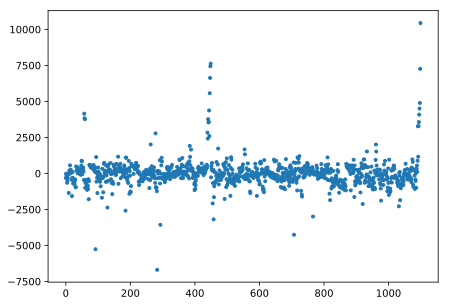

In [21]:
fit2.resid.plot(style='.', figsize=(7,5));

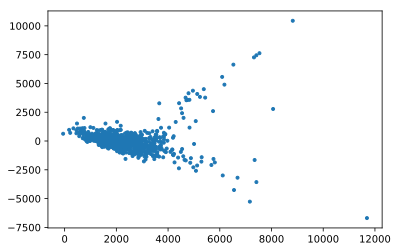

In [22]:
plt.plot(fit2.fittedvalues, fit2.resid, '.');

In [23]:
lr.fit(X,y)
lr.score(X,y)

0.5488639489896516

In [24]:
print(lr.intercept_)
print(lr.coef_)

-13889.953786136104
[ 2.43733664e+00 -3.56273011e+02  5.96992163e+02  5.85290574e+00
 -3.45357038e+02  7.98828744e+00  1.62295087e+00 -1.14924152e-03
  8.08729112e+00 -1.42390239e+02]


0.8542519446026503


(0, 5000)

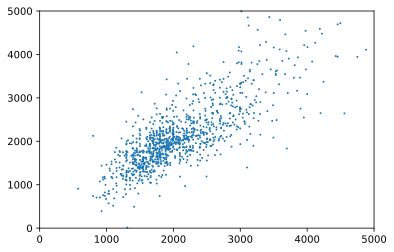

In [26]:
est = make_pipeline(PolynomialFeatures(2),StandardScaler(), LinearRegression())
poly_model = est.fit(X,y)
print(est.score(X,y))
plt.scatter(y,poly_model.predict(X), s=1)
plt.xlim(0,5000)
plt.ylim(0,5000)

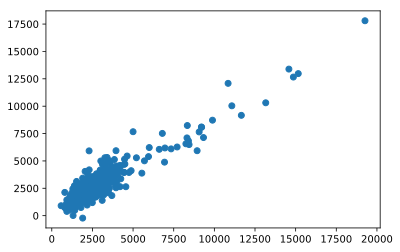

In [27]:
plt.scatter(y,poly_model.predict(X))

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [29]:
p = PolynomialFeatures(2)

In [30]:
XP2 = p.fit_transform(X)

In [31]:
s = StandardScaler()
XS = s.fit_transform(X)

In [32]:
print('The mean is: ',XP2.mean(axis=0))
print('The std is: ',XP2.std(axis=0))
print('The mean is: ',XS.mean(axis=0))
print('The std is: ',XS.std(axis=0))

The mean is:  [1.00000000e+00 8.15339091e+02 1.30636364e+00 1.25545455e+00
 2.00644182e+03 4.30363636e+00 6.06500909e+00 2.62710000e+03
 6.77177800e+05 1.93127273e+01 2.70909091e-01 8.33170434e+05
 1.34532091e+03 1.16113455e+03 1.63670978e+06 3.49867000e+03
 4.93485564e+03 2.13690947e+06 5.50740959e+08 1.45583100e+04
 2.29061818e+02 2.49909091e+00 1.92818182e+00 2.62196455e+03
 5.69363636e+00 7.93089091e+00 3.42011364e+03 8.80914800e+05
 2.23872727e+01 3.90909091e-01 1.81363636e+00 2.51988909e+03
 5.38818182e+00 7.59015455e+00 3.29441364e+03 8.49184618e+05
 2.31472727e+01 3.36363636e-01 4.02621040e+06 8.63363455e+03
 1.21733638e+04 5.27130995e+06 1.35879349e+09 3.87801309e+04
 5.43835455e+02 1.94090909e+01 2.65334818e+01 1.12976591e+04
 2.91202665e+06 8.43218182e+01 1.23545455e+00 3.93454665e+01
 1.59762276e+04 4.12581893e+06 1.18888018e+02 1.69424545e+00
 6.91530768e+06 1.78301973e+09 5.07776682e+04 7.06386364e+02
 4.60178565e+11 1.30928674e+07 1.82090245e+05 7.48929091e+02
 5.7954545

In [33]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
est.fit(X_train, y_train)
# Evaluate the model against the testing data (Rˆ2)
print(est.score(X_train, y_train))
print(est.score(X_test, y_test))
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8601119678364914
0.7173393022519081
0.5764429406591391
0.5053486516961401


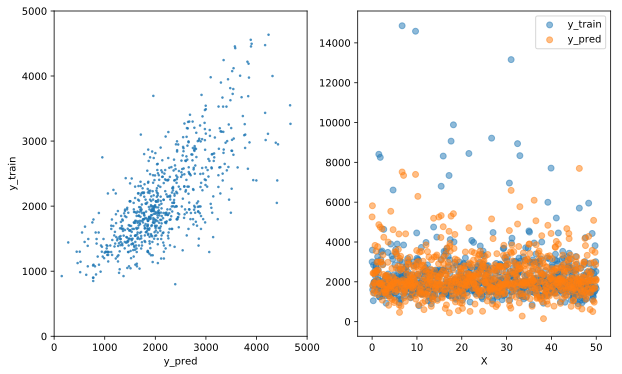

In [34]:
y_pred = lr.predict(X_train)
x_plot = np.linspace(0,50,len(y_pred))

plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.scatter(y_pred,y_train,s=3,alpha=0.7)
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.xlabel('y_pred')
plt.ylabel('y_train')

plt.subplot(1,2,2)
plt.scatter(x_plot,y_train,alpha=0.5)
plt.scatter(x_plot,y_pred,alpha=0.5)

plt.xlabel('X')
plt.legend(['y_train','y_pred'])

In [ ]:
X.columns

In [ ]:
# Remove multicollinear columns
Xa = X.iloc[:,[0,1,2,3,4,6,8,9]]

In [ ]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, y, test_size=0.3, random_state = 42)

In [ ]:
# Fit the model against the training data
est.fit(Xa_train, ya_train)
# Evaluate the model against the testing data (Rˆ2)
print(est.score(Xa_train, ya_train))
print(est.score(Xa_test, ya_test))
lr.fit(Xa_train, ya_train)
print(lr.score(Xa_train, ya_train))
print(lr.score(Xa_test, ya_test))

In [ ]:
poly_model = lr.fit(Xa_train,ya_train)
print(lr.score(Xa_train,ya_train))
plt.scatter(ya_train,poly_model.predict(Xa_train))
plt.xlim(0,5000)
plt.ylim(0,5000)

In [ ]:
poly_model = est.fit(Xa_train,ya_train)
print(est.score(Xa_train,ya_train))
plt.scatter(ya_train,poly_model.predict(Xa_train))
plt.xlim(0,5000)
plt.ylim(0,5000)

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
reg = LinearRegression()
scores = cross_val_score(reg, Xa_train, ya_train, cv=3, scoring='r2')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print('Rˆ2 for each cross-val:',scores,'\n')
print('Mean Rˆ2 of all cross vals:',np.mean(scores),'+-',np.std(scores))

In [ ]:
scores = cross_val_score(reg, Xa_train, ya_train, cv=3, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print('Mean for each cross-val:',-scores,'\n')
print('Mean of all cross vals:',np.mean(-scores),'+-',np.std(-scores))

In [ ]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, y, test_size=0.3, random_state = 25)

In [ ]:
# Fit the model against the training data
est.fit(Xa_train, ya_train)
# Evaluate the model against the testing data (Rˆ2)
print(est.score(Xa_train, ya_train))
print(est.score(Xa_test, ya_test))
lr.fit(Xa_train, ya_train)
print(lr.score(Xa_train, ya_train))
print(lr.score(Xa_test, ya_test))

In [ ]:
alpha = 3
degree = 2
ridge = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
ridge.fit(Xa_train, ya_train)

In [ ]:
# Evaluate the model against the testing data (Rˆ2)
print(ridge.score(Xa_train, ya_train))
print(ridge.score(Xa_test, ya_test))

In [ ]:
scores = cross_val_score(ridge, Xa_train, ya_train, cv=3, scoring='r2')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print('Rˆ2 for each cross-val:',scores,'\n')
print('Mean Rˆ2 of all cross vals:',np.mean(scores),'+-',np.std(scores))

In [ ]:
scores = cross_val_score(ridge, Xa_train, ya_train, cv=3, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print('Mean for each cross-val:',-scores,'\n')
print('Mean of all cross vals:',np.mean(-scores),'+-',np.std(-scores))